# Columns and Their Descriptions

- **Timestamp**: Timestamp of the transaction.
- **cc_num**: Credit card number (encrypted).
- **merchant**: The store or vendor where the transaction occurred.
- **category**: Transaction category (e.g., groceries, entertainment).
- **amt**: Transaction amount.
- **first**: Cardholder's first name.
- **last**: Cardholder's last name.
- **gender**: Cardholder's gender.
- **street**: Street where the cardholder resides.
- **city**: City where the cardholder resides.
- **state**: State where the cardholder resides.
- **zip**: Postal code of the cardholder.
- **lat**: Latitude of the cardholder's address.
- **long**: Longitude of the cardholder's address.
- **city_pop**: Population of the city where the transaction occurred.
- **job**: Cardholder's occupation.
- **dob**: Cardholder's date of birth.
- **trans_num**: Unique transaction number.
- **unix_time**: Unix timestamp of the transaction.
- **merch_lat**: Latitude of the merchant's location.
- **merch_long**: Longitude of the merchant's location.
- **is_fraud**: Indicates whether the transaction is fraudulent. This is the target feature I will predict.
- **merch_zipcode**: Merchant's postal code.


## nown lets check size of our dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("credit_card_transactions.csv")

data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [4]:
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 1296675
Number of columns: 24


## Exploring the datatypes of our dataset.

In [6]:

data_types = pd.DataFrame(data.dtypes).reset_index()
data_types.columns = ['Feature Name', 'Data Type'] 
data_types

,Feature Name,Data Type
0,Unnamed: 0,int64
1,trans_date_trans_time,object
2,cc_num,int64
3,merchant,object
4,category,object
5,amt,float64
6,first,object
7,last,object
8,gender,object
9,street,object


Whether having 24 features is good or bad depends on the context of your project and the type of model you plan to use. Here are a few factors to consider:

## Advantages of 24 Features:
- **Rich Information**: More features mean you can capture more detailed information, which might help in making more accurate predictions, especially if the features are highly relevant to the task.
- **Complexity**: If you're dealing with a complex problem, having more features can help represent the complexity of the data and lead to better results, as long as the data quality is high.

## Potential Downsides of 24 Features:
- **Overfitting**: With many features, especially if the dataset is not large enough, the model could overfit. This means the model might perform very well on the training data but fail to generalize to unseen data.
- **Irrelevant Features**: Not all features might be helpful, and including irrelevant or redundant features can make your model more complex without improving its performance.
- **Data Sparsity**: If some features are sparse or missing for many observations, it could negatively impact the model.
- **Computational Cost**: More features can increase the computational time and memory required to train the model.


## let's check whether our data has missing values or not.

In [9]:

missing_data_counts = data.isnull().sum()
missing_data_counts_df = pd.DataFrame(missing_data_counts).reset_index()
missing_data_counts_df.columns = ['Feature', 'Missing Value Count']
missing_data_counts_df

,Feature,Missing Value Count
0,Unnamed: 0,0
1,trans_date_trans_time,0
2,cc_num,0
3,merchant,0
4,category,0
5,amt,0
6,first,0
7,last,0
8,gender,0
9,street,0


## now will check the number of unique values in each column in our dataset.

In [11]:
unique_value_counts = data.nunique()
unique_value_counts_df = pd.DataFrame(unique_value_counts).reset_index()
unique_value_counts_df.columns = ['Feature', 'Number of Unique Values'] 
unique_value_counts_df

,Feature,Number of Unique Values
0,Unnamed: 0,1296675
1,trans_date_trans_time,1274791
2,cc_num,983
3,merchant,693
4,category,14
5,amt,52928
6,first,352
7,last,481
8,gender,2
9,street,983


## now will check for if there are any duplications in our dataset.

In [13]:
print(f'Number of duplicated rows: {data.duplicated().sum()}')

Number of duplicated rows: 0


### we can see that our data does not have any duplicate row which is good thing also it will save our time and computational power

# Data Visualisation
### Now let's visualize the one of the most important catrgorial feature of our dataset which generalize that whether transaction is fraud or not 

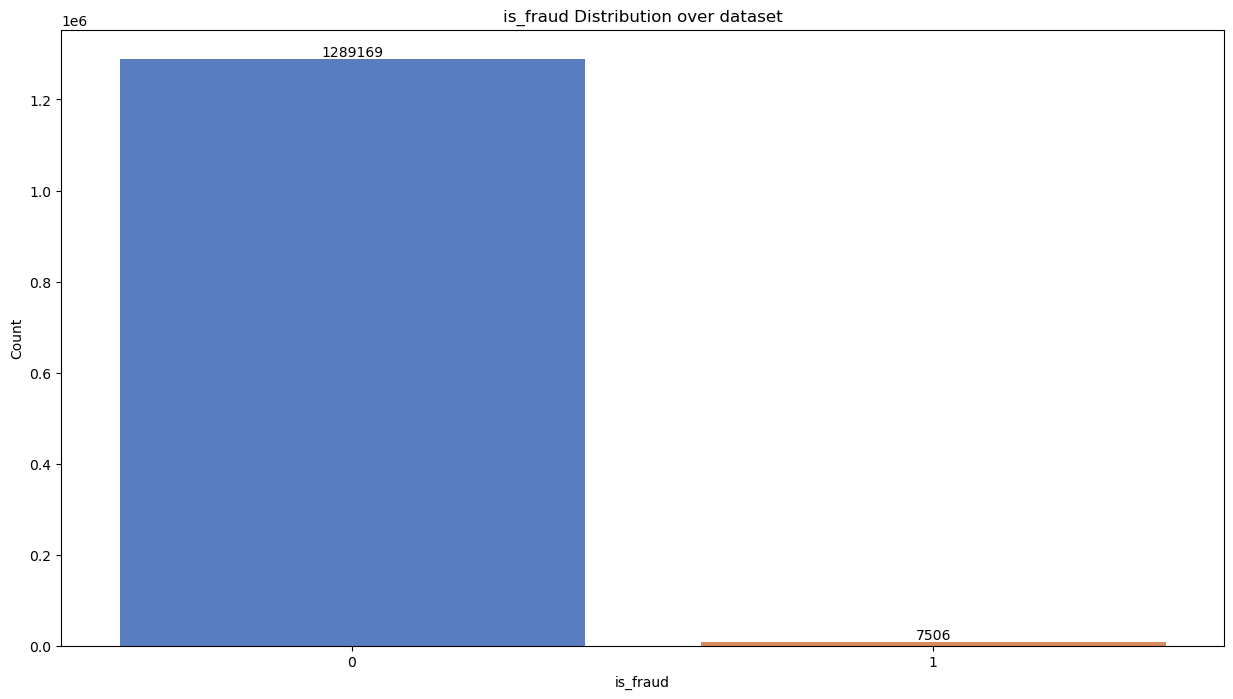

In [16]:
plt.figure(figsize=(15, 8))
axs = sns.countplot(x='is_fraud', data=data, hue='is_fraud', palette='muted',legend=False)
for p in axs.patches:
    axs.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black')
plt.title('is_fraud Distribution over dataset')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.show()

### As we can see, our dataset has a quite imbalanced distribution across the dataset. 

Only the 7506 rows of the data (% 0.58) are fraudulent, which can cause further problems when we train the model. Therefore, we need to balance the dataset during data preprocessing.

For this, we have two techniques:
1. **Synthetic Minority Oversampling Technique (SMOTE)**: Some researchers use SMOTE as a solution, which avoids the drawbacks of under and over sampling. However, the SMOTE method causes an increase in the false-positive rate, which is not acceptable in banking.
2. **Class Weight Tuning Hyperparameter**: To solve this problem, in this study, we use class weight tuning hyperparameter to address the mentioned disadvantages.


## Visualization of the is_fraud distribution across dataset based on some categorical variables using a bar chart.

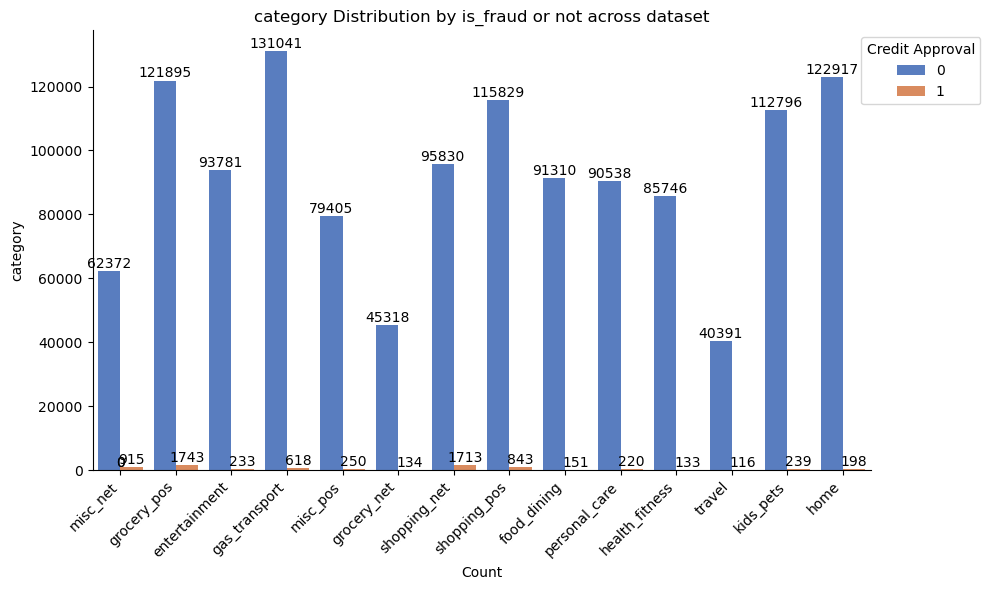

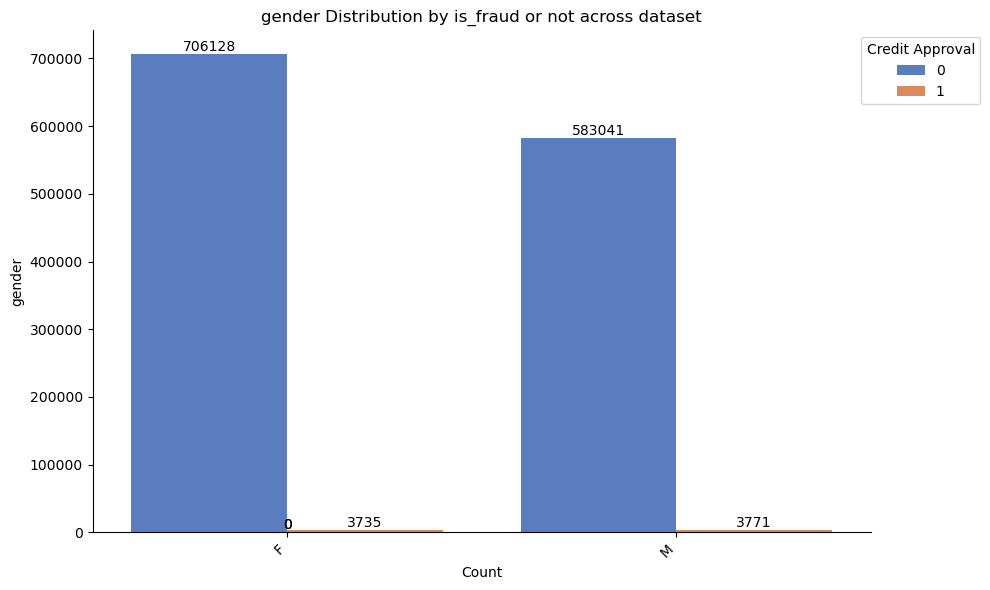

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns to visualize
categorical_columns = ['category', 'gender']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, hue='is_fraud', data=data, palette='muted')
    plt.title(f'{column} Distribution by is_fraud or not across dataset')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.legend(title='Credit Approval', loc='upper right', bbox_to_anchor=(1.15, 1))
    
    # Remove the top and right spines for cleaner visualization
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    
    # Annotating each bar with its respective count
    for p in ax.patches:
        height = p.get_height()  # For vertical bar, height represents count
        ax.text(p.get_x() + p.get_width() / 2, height + 10, 
                f'{int(height)}', 
                ha='center', va='bottom')
    
    # Rotate x-axis labels to avoid overlap
    plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align them to the right

    # Show the plot
    plt.tight_layout()
    plt.show()


 #### only seeing the graph we can easily identify that grocery_pos and shopping_net has the highest fraud happend also ration of happening fraud with maales are high then females

#### Let's plot the histograms for some of the numerical features.

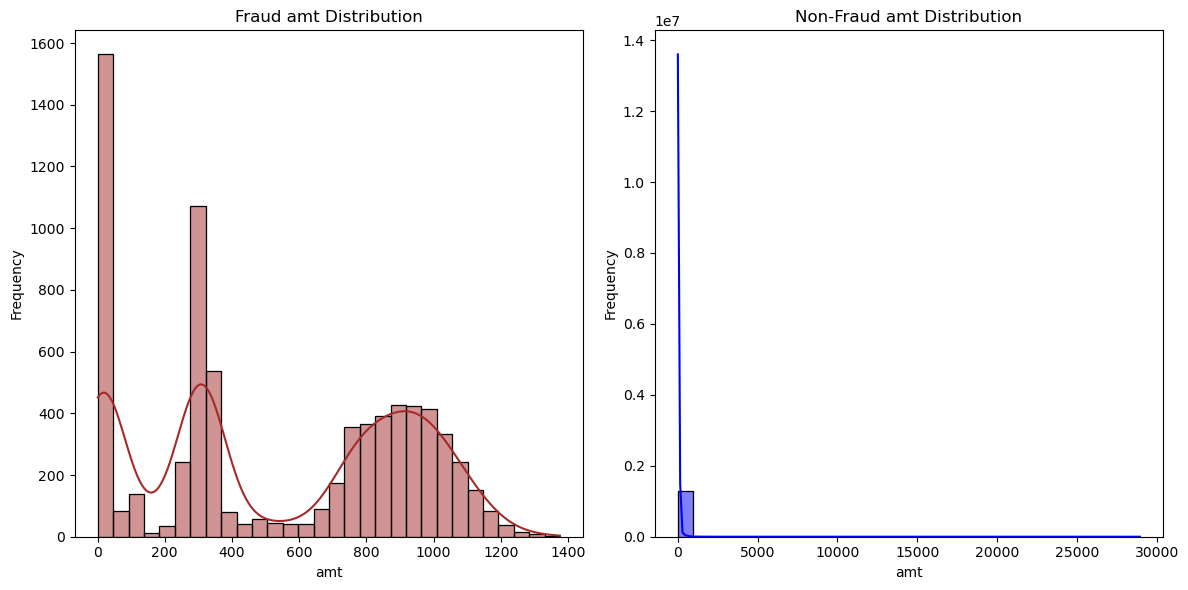

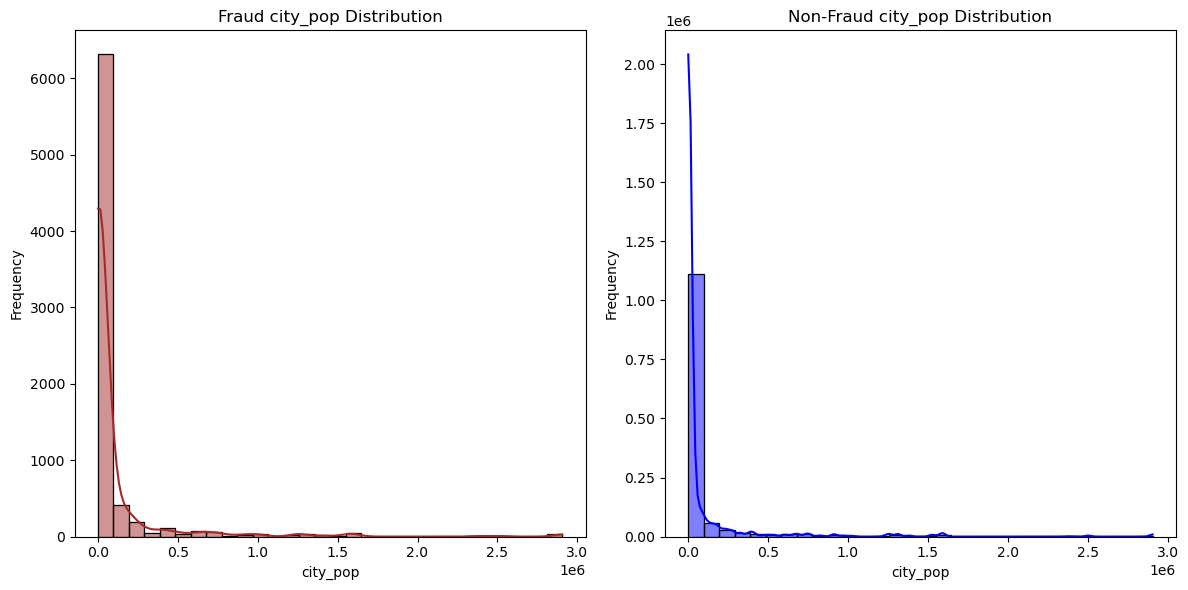

In [22]:

numeric_columns = ['amt', 'city_pop']

for column in numeric_columns:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data[data['is_fraud'] == 1][column], bins=30, kde=True, color='brown')
    plt.title(f'Fraud {column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.histplot(data[data['is_fraud'] == 0][column], bins=30, kde=True, color='blue')
    plt.title(f'Non-Fraud {column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

## Visualizing monthly and yearly fraud transactions.

object
Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud, merch_zipcode]
Index: []

[0 rows x 24 columns]


C:\Users\Krisha\AppData\Local\Temp\ipykernel_15332\3221834106.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, palette='pastel')


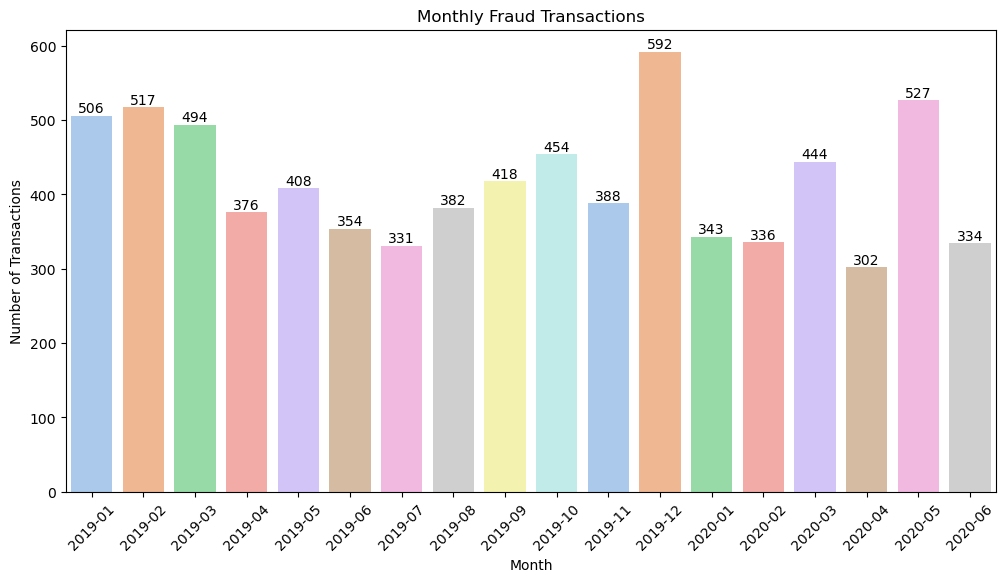

C:\Users\Krisha\AppData\Local\Temp\ipykernel_15332\3221834106.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_counts.index, y=seasonal_counts.values, palette='pastel')


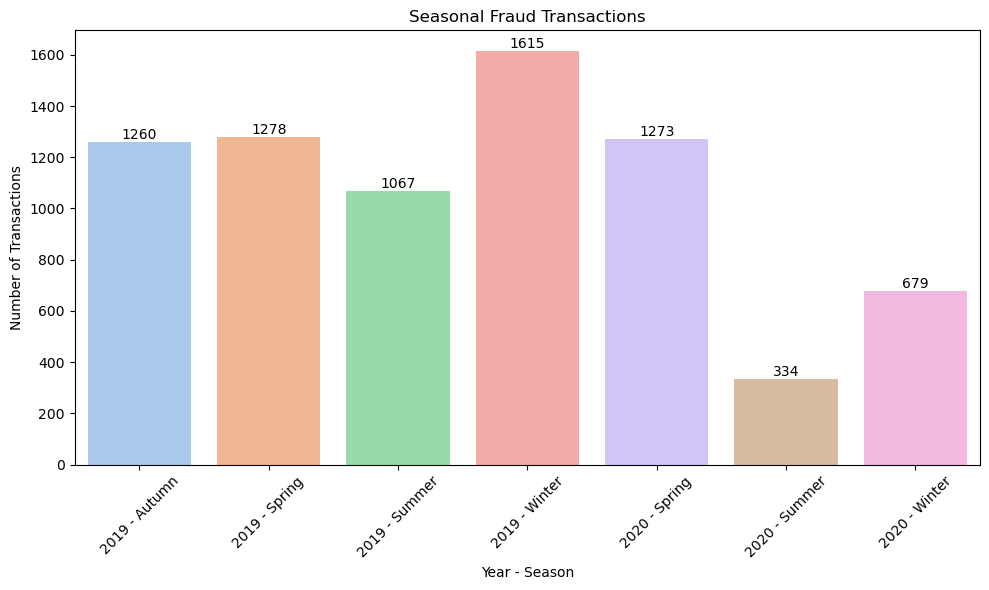

In [24]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data is loaded and 'is_fraud' column exists
data_copy = data.copy()

# Filter the fraud transactions
fraud_transactions = data_copy[data_copy['is_fraud'] == 1].copy()  # Create a deep copy to avoid SettingWithCopyWarning
non_fraud_transactions = data_copy[data_copy['is_fraud'] == 0]

# Check the column type of 'trans_date_trans_time' before conversion
print(fraud_transactions['trans_date_trans_time'].dtype)  # Check the current type

# Try converting 'trans_date_trans_time' to datetime safely and check for errors
fraud_transactions['trans_date_trans_time'] = pd.to_datetime(fraud_transactions['trans_date_trans_time'], errors='coerce')

# Check for any rows where conversion failed (NaT indicates failed conversion)
print(fraud_transactions[fraud_transactions['trans_date_trans_time'].isna()])

# Monthly fraud transaction counts
monthly_counts = fraud_transactions['trans_date_trans_time'].dt.to_period('M').value_counts().sort_index()

# Assign season and year using .loc to avoid SettingWithCopyWarning
fraud_transactions.loc[:, 'season'] = fraud_transactions['trans_date_trans_time'].dt.month % 12 // 3 + 1
fraud_transactions.loc[:, 'year'] = fraud_transactions['trans_date_trans_time'].dt.year
fraud_transactions.loc[:, 'year_season'] = fraud_transactions['year'].astype(str) + ' - ' + fraud_transactions['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})

# Seasonal counts of fraud transactions
seasonal_counts = fraud_transactions['year_season'].value_counts().sort_index()

# Plot monthly fraud transactions with pastel palette
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, palette='pastel')
plt.title('Monthly Fraud Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

# Annotate counts on top of bars
for i, count in enumerate(monthly_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

# Plot seasonal fraud transactions with pastel palette
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_counts.index, y=seasonal_counts.values, palette='pastel')
plt.title('Seasonal Fraud Transactions')
plt.xlabel('Year - Season')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

# Annotate counts on top of bars
for i, count in enumerate(seasonal_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Interestingly, we can see that there were no fraudulent transactions at all during the autumn of 2020

### Let's observe which hours have a higher occurrence of fraudulent transactions

C:\Users\Krisha\AppData\Local\Temp\ipykernel_15332\3553366843.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_hourly_fraud_counts.index,


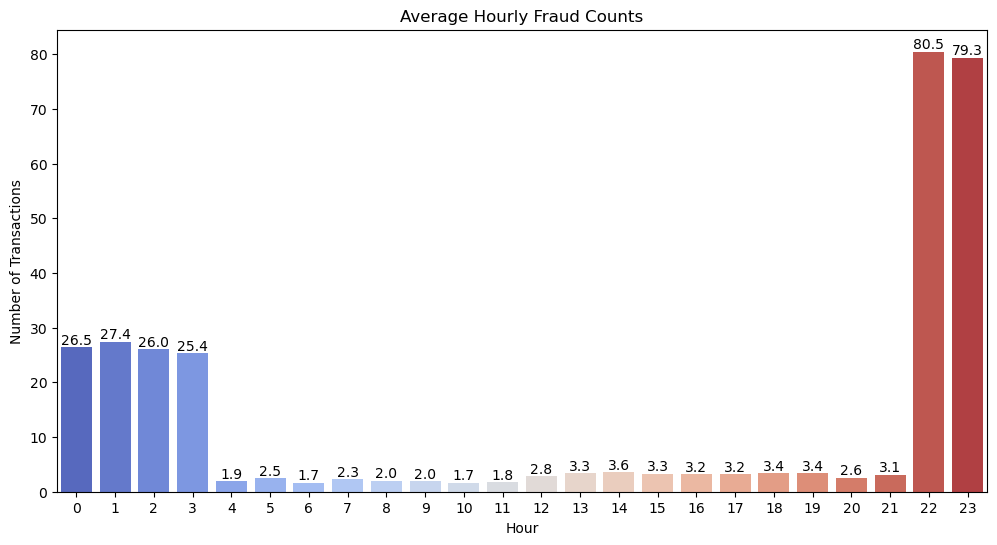

In [27]:
# Let's observe which hours have a higher occurrence of fraudulent transactions
fraud_transactions['hour'] = fraud_transactions['trans_date_trans_time'].dt.hour
hourly_fraud_counts = fraud_transactions['hour'].value_counts().sort_index()
average_hourly_fraud_counts = hourly_fraud_counts / fraud_transactions['hour'].value_counts().count()

plt.figure(figsize=(12, 6))
sns.barplot(x=average_hourly_fraud_counts.index, 
            y=average_hourly_fraud_counts.values, 
            palette='coolwarm', hue=None)  # Set hue=None to avoid warning
plt.title('Average Hourly Fraud Counts')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)

# Annotate the counts on top of the bars
for i, count in enumerate(average_hourly_fraud_counts.values):
    plt.text(i, count, f"{count:.1f}", ha='center', va='bottom')

plt.show()


#### As you can see, a large majority of fraudulent  occurred between 22:00 and 03:59, particularly between 22:00 and 23:59.

### Calculating and visualising the average number of fraud transactions for each day of the week.

C:\Users\Krisha\AppData\Local\Temp\ipykernel_15332\2745542359.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_weekday_fraud_counts.index,


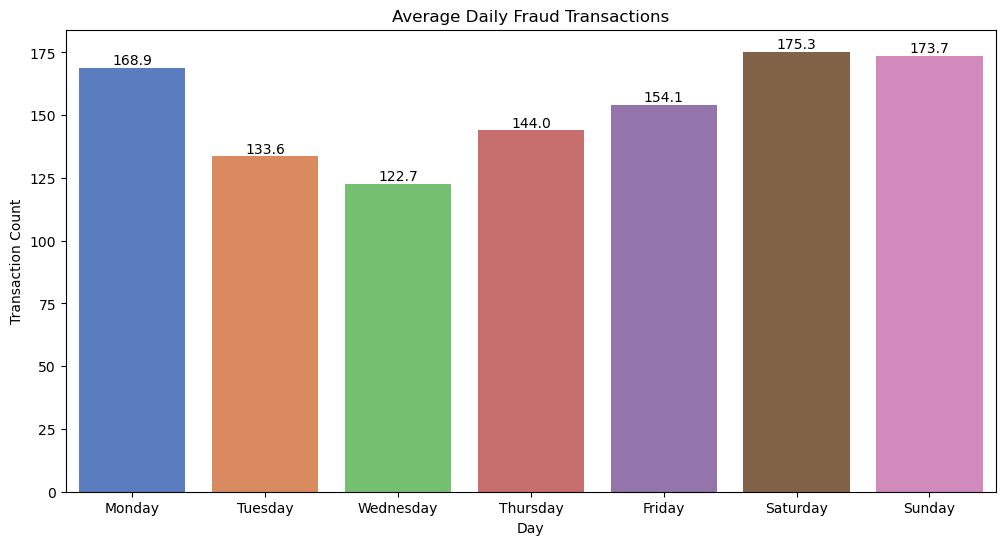

In [30]:
# Let's analyze the average daily fraud transactions
fraud_transactions['weekday'] = fraud_transactions['trans_date_trans_time'].dt.weekday
weekday_fraud_counts = fraud_transactions['weekday'].value_counts().sort_index()
average_weekday_fraud_counts = weekday_fraud_counts / fraud_transactions['weekday'].value_counts().count()

# Days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))
sns.barplot(x=average_weekday_fraud_counts.index, 
            y=average_weekday_fraud_counts.values, 
            palette='muted')  # Using pastel color palette
plt.title('Average Daily Fraud Transactions')
plt.xlabel('Day')
plt.ylabel('Transaction Count')
plt.xticks(ticks=average_weekday_fraud_counts.index, labels=days_of_week, rotation=0)

# Annotate the counts on top of the bars
for i, count in enumerate(average_weekday_fraud_counts.values):
    plt.text(i, count, f"{count:.1f}", ha='center', va='bottom')

plt.show()


# 3. Data Manupilation
## 3.1. Detecting and Removing Outliers
#### The only numerical value we can use for outlier detection is the transaction amount (amt). Other numerical values, such as population, latitude, longitude, etc., do not hold any meaningful statistical significance or distribution in this context.

#### I will consider data points above a certain amt value as outliers and remove them.

#### To examine the structure of the amt column and decide on a suitable threshold, I need to plot a scatterplot.

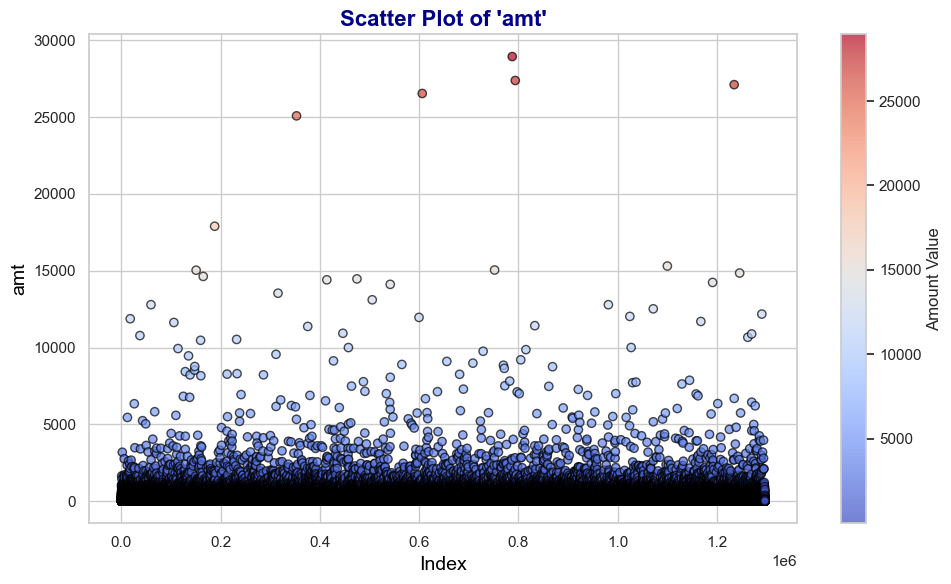

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for the plot using Seaborn
sns.set(style="whitegrid")

# Create the scatter plot with a gradient color and a better layout
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['amt'], c=data['amt'], cmap='coolwarm', edgecolors='black', alpha=0.7)

# Title and labels with better font size and color
plt.title("Scatter Plot of 'amt'", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Index', fontsize=14, color='black')
plt.ylabel('amt', fontsize=14, color='black')

# Adding a colorbar to indicate the scale of the 'amt' values
plt.colorbar(label='Amount Value')

# Show the plot
plt.tight_layout()
plt.show()


#### Upon visual inspection, it is possible to see that the data points start to disperse after values around 2500 to 4000.

#### Let's set the threshold at 3500 and visualize the results.

C:\Users\Krisha\AppData\Local\Temp\ipykernel_15332\3791661981.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Krisha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


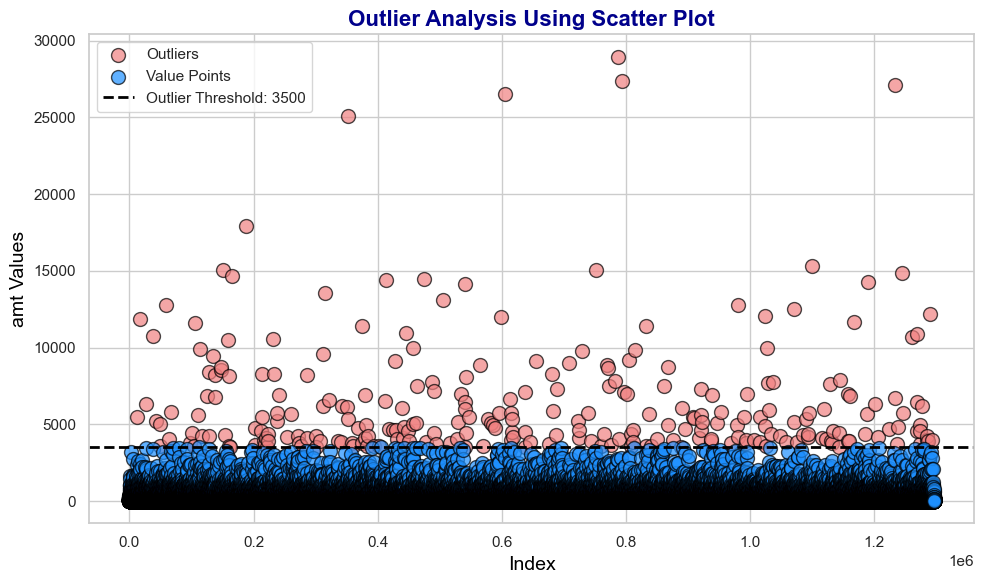

Number of outliers: 261
Outlier percentage: 0.02%


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a nice style for the plot using Seaborn
sns.set(style="whitegrid")

# Define outlier threshold
outlier_threshold = 3500
outliers = data['amt'] > outlier_threshold
outlier_count = np.count_nonzero(outliers)
total_count = len(data)
outlier_percentage = (outlier_count / total_count) * 100

# Create the scatter plot with nice color mapping and styling
plt.figure(figsize=(10, 6))

# Plot outliers with a distinct color and points for regular values
plt.scatter(data.index[outliers], data['amt'][outliers], c='lightcoral', edgecolors='black', alpha=0.7, label='Outliers', s=100)
plt.scatter(data.index[~outliers], data['amt'][~outliers], c='dodgerblue', edgecolors='black', alpha=0.7, label='Value Points', s=100)

# Add a horizontal line for the outlier threshold
plt.axhline(y=outlier_threshold, color='black', linestyle='--', label=f'Outlier Threshold: {outlier_threshold}', linewidth=2)

# Title and labels with better font size and color
plt.title('Outlier Analysis Using Scatter Plot', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Index', fontsize=14, color='black')
plt.ylabel('amt Values', fontsize=14, color='black')

# Show legend
plt.legend()

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

# Print outlier statistics
print(f'Number of outliers: {outlier_count}')
print(f'Outlier percentage: {outlier_percentage:.2f}%')


### I am going to remove all records where the amt value is greater than 3500. Only  261 entries will be lost, resulting in a  0.0201% data loss. Given the dataset's size, this is not considered a significant loss of data.

In [36]:
data = data[~outliers]

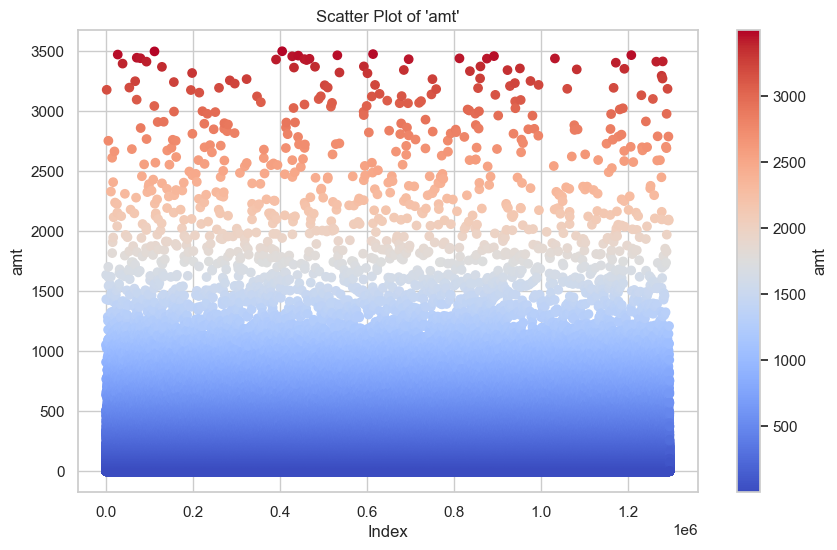

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
plt.scatter(data.index, data['amt'], c=data['amt'], cmap='coolwarm')  # Apply coolwarm colormap
plt.title("Scatter Plot of 'amt'")  
plt.xlabel('Index')  
plt.ylabel('amt')  
plt.colorbar(label='amt')  # Add colorbar to indicate the scale
plt.show()


## 3.2. Dropping Unnecessary Features¶
### Let's remove the following columns, as they are not necessary for training our model.

### Unnamed: 0 - It's a unique number similar to an index, which is meaningless for training purposes.
### first - The cardholder's first and last names are irrelevant for training purposes.
### last - The cardholder's first and last names are irrelevant for training purposes.
### street - Since we already have lat and lon information, we don't need the data in these columns.
### city - Since we already have lat and lon information, we don't need the data in these columns.
### state - Since we already have lat and lon information, we don't need the data in these columns.
### zip - Since we already have lat and lon information, we don't need the data in these columns.
### trans_num - It's a unique number for each transaction, which is meaningless for training purposes.
### unix_time - We can get the same information from 'trans_date_trans_time' column.
### merch_zipcode - Since we already have lat and lon information, we don't need the data in these columns.


In [42]:
to_drop = ['Unnamed: 0', 'first', 'last', 'street', 'city', 'state', 'zip', 'trans_num','unix_time','merch_zipcode']
data = data.drop(columns=to_drop)

In [43]:
# size of our dataset.
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 1296414
Number of columns: 14


### 3.3. Feature Creation¶
We need to create the trans_year, trans_month, trans_day, trans_season, trans_weekday, trans_hour, trans_minute, 
#and trans_second columns using the trans_date_trans_time column. Afterwards, we can remove the trans_date_trans_time column.

In [46]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['trans_year'] = data['trans_date_trans_time'].dt.year
data['trans_month'] = data['trans_date_trans_time'].dt.month
data['trans_day'] = data['trans_date_trans_time'].dt.day
data['trans_season'] = data['trans_date_trans_time'].dt.month % 12 // 3 + 1  #1 = Winter, 2 = Spring, 3 = Summer, 4 = Autumn
data['trans_weekday'] = data['trans_date_trans_time'].dt.weekday 
data['trans_hour'] = data['trans_date_trans_time'].dt.hour
data['trans_minute'] = data['trans_date_trans_time'].dt.minute
data['trans_second'] = data['trans_date_trans_time'].dt.second

data = data.drop(columns=['trans_date_trans_time'])

### Now, let's calculate the cardholder's age at the time the transaction occurred.

In [48]:
data['dob'] = pd.to_datetime(data['dob'])
data['birth_year'] = data['dob'].dt.year
data['card_holder_age'] = data['trans_year'] - data['birth_year']
data = data.drop(columns=['dob', 'birth_year'])

### I will calculate the geographical distance between two points using their latitude and longitude coordinates using geopy library. 
#### The geopy library simplifies calculating geographical distances between points with high precision by providing easy-to-use methods 
#### that account for the Earth's curvature.

In [50]:
!conda install -c conda-forge geopy -y


Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [51]:
from geopy.distance import geodesic

def calculate_distance(row):
    point_a = (row['lat'], row['long'])
    point_b = (row['merch_lat'], row['merch_long'])
    return geodesic(point_a, point_b).kilometers 

data['distance'] = data.apply(calculate_distance, axis=1)

## Encoding¶
Using LabelEncoder to convert categorical features into numerical values for model training.

In [55]:
from sklearn.preprocessing import LabelEncoder


In [56]:
def encode_categorical_columns(data, columns):
    le = LabelEncoder()
    for col in columns:
        data[col] = le.fit_transform(data[col])
    return data

cat_features = ['cc_num', 'merchant', 'category', 'gender', 'job']
data = encode_categorical_columns(data, cat_features)
data.head()

,cc_num,merchant,category,amt,gender,lat,long,city_pop,job,merch_lat,...,trans_year,trans_month,trans_day,trans_season,trans_weekday,trans_hour,trans_minute,trans_second,card_holder_age,distance
0,444,514,8,4.97,0,36.0788,-81.1781,3495,370,36.011293,...,2019,1,1,1,1,0,0,18,31,78.773821
1,42,241,4,107.23,0,48.8878,-118.2105,149,428,49.159047,...,2019,1,1,1,1,0,0,44,41,30.216618
2,237,390,0,220.11,1,42.1808,-112.2620,4154,307,43.150704,...,2019,1,1,1,1,0,0,51,57,108.102912
3,509,360,2,45.00,1,46.2306,-112.1138,1939,328,47.034331,...,2019,1,1,1,1,0,1,16,52,95.685115
4,368,297,9,41.96,1,38.4207,-79.4629,99,116,38.674999,...,2019,1,1,1,1,0,3,6,33,77.702395


# 4. Over sampling using SMOTE and spliting dataset

## Apply SMOTE on the Dataset

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#  (0 = Legitimate, 1 = Fraud)
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE on training data
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", pd.Series(y_train_resampled).value_counts())


Before SMOTE:
 is_fraud
0    1031126
1       6005
Name: count, dtype: int64
After SMOTE:
 is_fraud
0    1031126
1     515563
Name: count, dtype: int64


# 5. model selction

Model Selection¶
Here, I specifically defined the CatBoost, XGBooost, and LightGBM models. I tried to optimize the hyperparameters of the models beforehand using Optuna. Later, by tweaking the model's hyperparameters, it may be possible to improve the model's performance.

I defined the class_weights object to ensure that each class is equally considered by the model in a dataset with imbalanced class distribution. The compute_class_weight function calculates weights based on class frequencies, and these weights are converted into a dictionary. This dictionary is used in the parameters of the CatBoostClassifier, XGBClassifier, and LGBMClassifier models to give more importance to underrepresented classes during the learning process. This approach helps mitigate the negative effects of class imbalance and enhances the overall performance of the model.

In [94]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Compute class weights safely
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y), class_weights)}
class_weights_list = list(class_weights_dict.values())  # CatBoost needs a list

# Compute scale_pos_weight for XGBoost & LGBM
scale_pos_weight = class_weights_dict[np.unique(y)[1]] / class_weights_dict[np.unique(y)[0]]

models = {
    "Catboost": CatBoostClassifier(
        depth=10,
        learning_rate=0.2,
        n_estimators=2000,
        min_child_samples=10,
        subsample=0.7,
        l2_leaf_reg=8,
        cat_features=cat_features,
        random_state=1881,
        eval_metric='F1',
        loss_function='Logloss',
        bootstrap_type='Bernoulli',
        class_weights=class_weights_list,  # Fixed
        task_type='GPU',
        verbose=False
    ),
    "XGBoost": XGBClassifier(
        max_depth=7,
        learning_rate=0.2,
        n_estimators=2000,
        min_child_weight=10,
        subsample=0.8,
        reg_lambda=1,
        reg_alpha=3,
        scale_pos_weight=scale_pos_weight,  # Fixed
        objective='binary:logistic',
        eval_metric='logloss',
        tree_method='gpu_hist',
        random_state=1881,
        verbosity=0  # Fixed
    ),
    "LGBM": LGBMClassifier(
        max_depth=8,
        num_leaves=64,
        learning_rate=0.03,
        n_estimators=2000,
        min_child_weight=10,
        subsample=0.9,
        reg_lambda=3,
        reg_alpha=1,
        scale_pos_weight=scale_pos_weight,  # Fixed
        objective='binary',
        metric='binary_logloss',
        random_state=1881,
        device="gpu",
        verbose=-1  # Keep silent mode
    )
}


 ## Ensembling Catboost, XGBoost and LightGBM¶
As observed, the performance of all three models is relatively good. Now, let's combine all the models using a soft voting ensemble model and train it on the training dataset. Afterwards, we will evaluate the performance of the new model on the test dataset.

In [100]:
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier with CatBoost, XGBoost, and LightGBM
voting_clf = VotingClassifier(
    estimators=[
        ('Catboost', models["Catboost"]),
        ('XGBoost', models["XGBoost"]),
        ('LGBM', models["LGBM"])
    ],
    voting='soft'  # Soft voting for probability averaging
)

# Train the voting classifier
voting_clf.fit(X_train_resampled, y_train_resampled)

# Predict using the ensemble model
y_pred = voting_clf.predict(X_test)


In [106]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

metrics = {
    'Metric': ['F1 Score', 'Precision', 'Recall'],
    'Value': [f1, precision, recall]
}

metrics_df = pd.DataFrame(metrics)
metrics_df

,Metric,Value
0,F1 Score,0.861510
1,Precision,0.796045
2,Recall,0.938708


## confusion matrix

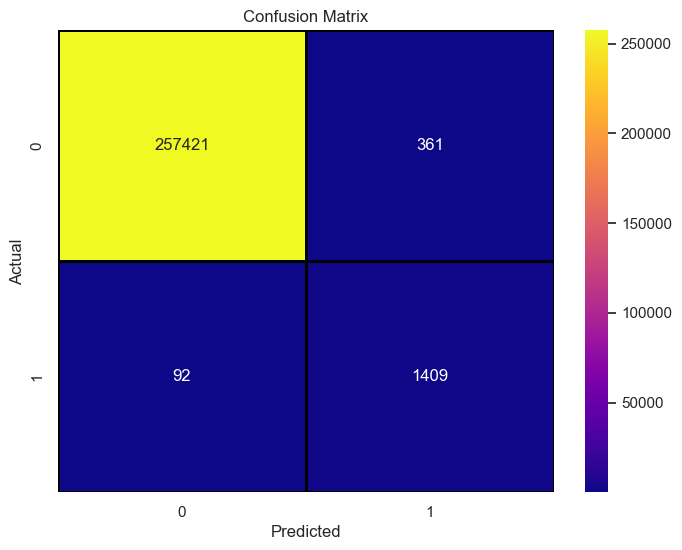

In [110]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', cbar=True, linewidths=1, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## ROC-AUC Curve

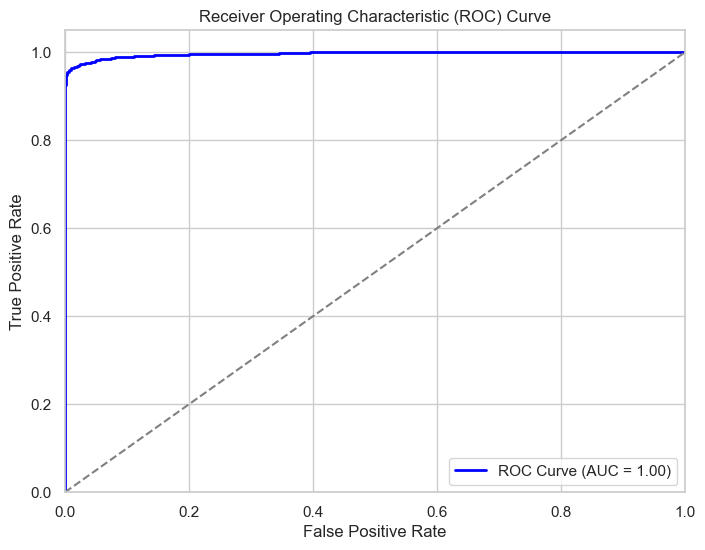

In [123]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_probs = voting_clf.predict_proba(X_test)[:, 1]  # Take probability of class 1

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [114]:
from sklearn.metrics import classification_report

clf_report = classification_report(y_test, y_pred, output_dict=True)
rep_df = pd.DataFrame(clf_report).transpose()
rep_df

,precision,recall,f1-score,support
0,0.999643,0.998600,0.999121,257782.000000
1,0.796045,0.938708,0.861510,1501.000000
accuracy,0.998253,0.998253,0.998253,0.998253
macro avg,0.897844,0.968654,0.930316,259283.000000
weighted avg,0.998464,0.998253,0.998324,259283.000000


C:\Users\Krisha\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:51:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
C:\Users\Krisha\AppData\Local\Temp\ipykernel_15332\2598547846.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average', y='Feature', data=top_features, palette='viridis')


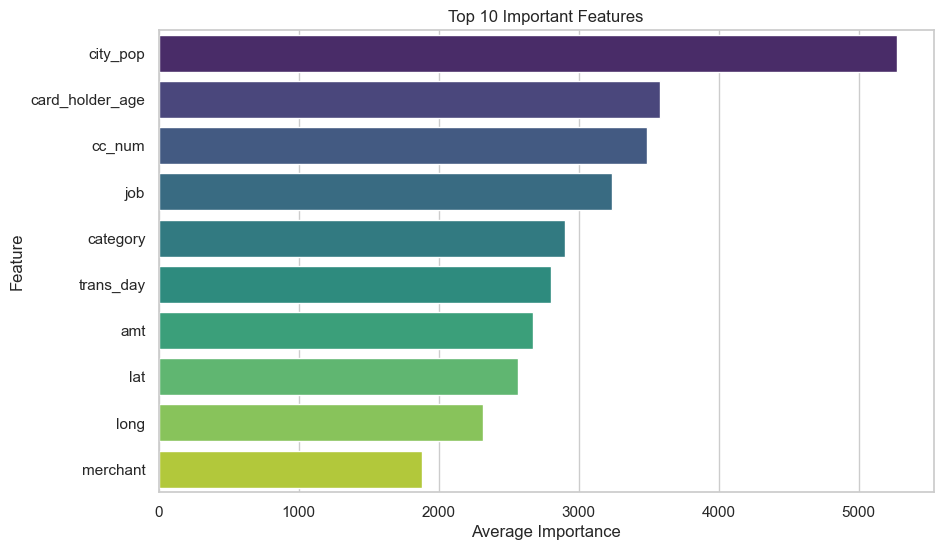

In [118]:
# Train each model before accessing feature importances
models["Catboost"].fit(X_train_resampled, y_train_resampled)
models["XGBoost"].fit(X_train_resampled, y_train_resampled)
models["LGBM"].fit(X_train_resampled, y_train_resampled)

# Now extract feature importances
catboost_importance = models['Catboost'].feature_importances_
xgboost_importance = models['XGBoost'].feature_importances_
lgbm_importance = models['LGBM'].feature_importances_

# Convert to DataFrame
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'CatBoost': catboost_importance,
    'XGBoost': xgboost_importance,
    'LGBM': lgbm_importance
})

# Compute Average Importance
importance_df['Average'] = importance_df[['CatBoost', 'XGBoost', 'LGBM']].mean(axis=1)

# Select Top 10 Features
top_features = importance_df.nlargest(10, 'Average')

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Average', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Average Importance')
plt.ylabel('Feature')
plt.show()
